In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import seaborn as sn

Loading-"MNIST Data Set"

Containing Training Samples =60,000 , Testing Samples =10,000

TensorFlow already contain MNIST data set which can be loaded using keras

In [25]:
mnist=tf.keras.datasets.mnist 
#The handwritten dataset is in built in the keras and it's being loaded in the mnist

Dividing the data sets into Training and Testing datasets

In [26]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

1


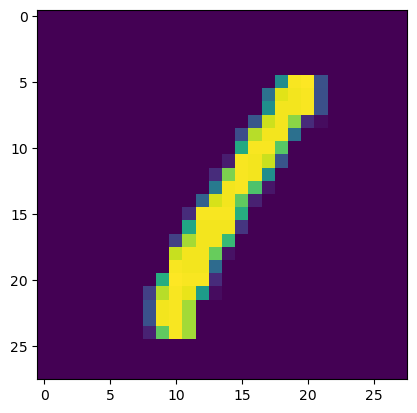

In [28]:
plt.imshow(x_train[3])
print(y_train[3])
plt.show()

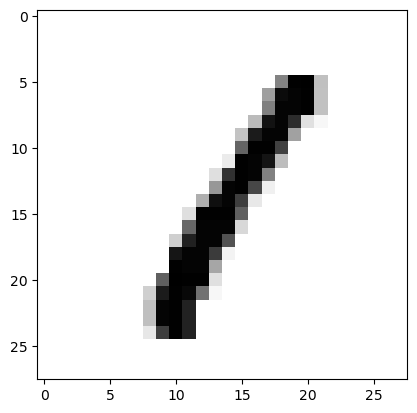

In [29]:
plt.imshow(x_train[3],cmap=plt.cm.binary)

Checking the values of each pixels

Before Normalization



In [30]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

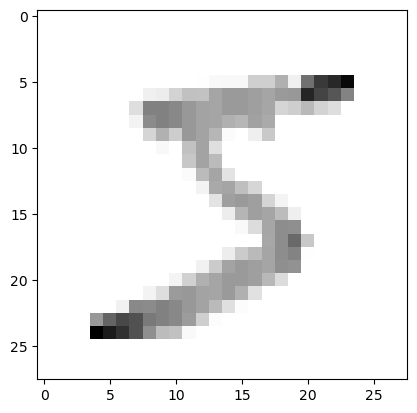

In [31]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [32]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Normalization makes the picture not dependent on anyother colur other than white and black 

In [33]:
print(y_train[0])

5


In [34]:
imz_size=28
x_trainer=np.array(x_train).reshape(-1,imz_size,imz_size,1)
x_tester=np.array(x_test).reshape(-1,imz_size,imz_size,1)
print("Training Samples dimension",x_trainer.shape)
print("Testing Sample dimension",x_tester.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Sample dimension (10000, 28, 28, 1)


Creating a Deep Neural Network

In [35]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainer.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

One convolutional layer with 64 kernels (3 X 3) 

In [36]:
#2nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
#3rd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
#1st Fully connected Layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [39]:
model.add(Dense(32))
model.add(Activation("relu"))

In [40]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [42]:
print("Total Training Sample= ",len(x_trainer))

Total Training Sample=  60000


In [43]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [44]:
model.fit(x_trainer,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 41s 30ms/step - loss: 0.3158 - accuracy: 0.9026 - val_loss: 0.1326 - val_accuracy: 0.9602
Epoch 2/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.1032 - accuracy: 0.9680 - val_loss: 0.1006 - val_accuracy: 0.9692
Epoch 3/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.0784 - val_accuracy: 0.9763
Epoch 4/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.0640 - val_accuracy: 0.9799
Epoch 5/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0772 - val_accuracy: 0.9777
Epoch 6/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0719 - val_accuracy: 0.9786
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0713 -

In [45]:
test_loss,test_acc=model.evaluate(x_tester,y_test)
print("Test Loss on 10,000 test sample ",test_loss)
print("Validation Accuracy on 10,000 test sample",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0528 - accuracy: 0.9864
Test Loss on 10,000 test sample  0.0528397336602211
Validation Accuracy on 10,000 test sample 0.9864000082015991


In [46]:
predicted=model.predict([x_tester])

313/313 [==============================] - 1s 4ms/step


In [47]:
print(predicted)

[[7.3104661e-11 3.3184562e-09 9.1098080e-08 ... 9.9999940e-01
  7.9697915e-11 3.1060443e-07]
 [5.9011485e-04 6.8315867e-06 9.9939907e-01 ... 4.8208754e-08
  2.3579965e-08 3.9094334e-06]
 [1.6879402e-07 9.9995673e-01 2.4232399e-08 ... 4.5421888e-08
  7.9238074e-09 8.0115239e-09]
 ...
 [3.5253616e-11 1.8363563e-07 5.1444327e-10 ... 4.4358146e-08
  6.8511660e-08 1.1428770e-05]
 [2.1013407e-09 3.0495753e-13 5.1604429e-13 ... 8.1648775e-15
  1.3458857e-07 2.2936046e-09]
 [9.5613384e-09 4.6045508e-13 2.6656728e-09 ... 9.8778269e-19
  1.3097666e-09 2.3894353e-08]]


In [48]:
print(np.argmax(predicted[18]))

8


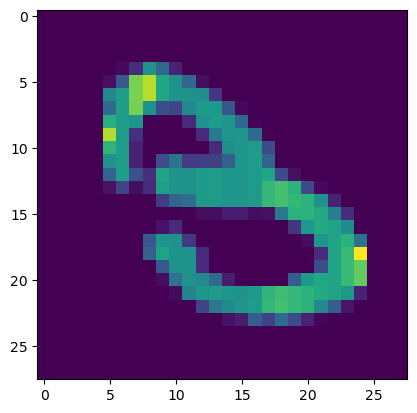

In [49]:
plt.imshow(x_test[18])

In [58]:
predicted_labels = np.argmax(predicted, axis=1)


In [59]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    0,    1,    0,    1,    1,    1,    2],
       [   0, 1132,    0,    1,    0,    1,    0,    1,    0,    0],
       [   7,    0, 1016,    0,    2,    0,    0,    5,    2,    0],
       [   0,    0,    2,  996,    0,    6,    0,    1,    5,    0],
       [   1,    0,    0,    0,  973,    0,    0,    0,    0,    8],
       [   3,    0,    0,    4,    0,  877,    4,    1,    2,    1],
       [   5,    3,    0,    0,    9,    1,  937,    0,    3,    0],
       [   2,    6,   10,    2,    0,    1,    0, 1002,    3,    2],
       [   0,    0,    2,    1,    3,    3,    0,    0,  962,    3],
       [   2,    0,    0,    0,    6,    2,    0,    0,    3,  996]])>

Text(95.72222222222221, 0.5, 'Truth')

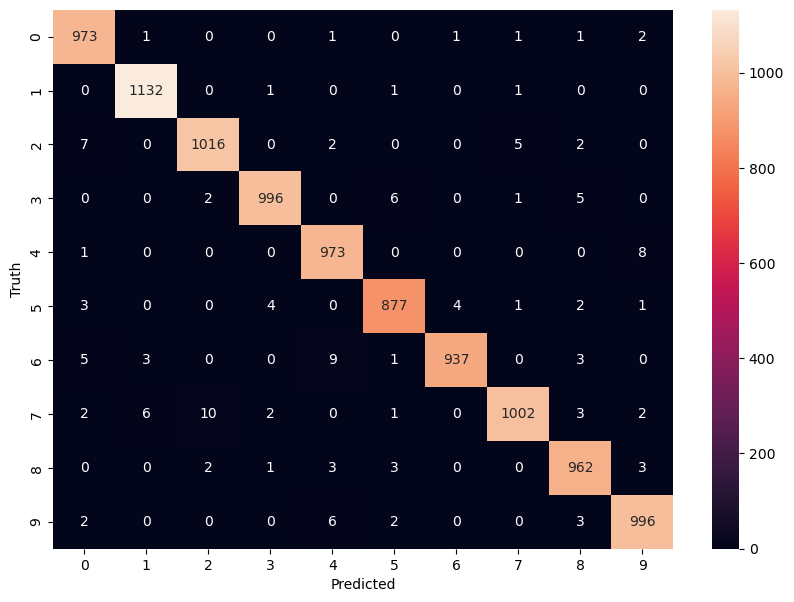

In [72]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')